In [21]:
import pandas as pd
import numpy as np

# Replacing -999 with NaN in HURDAT2

In [22]:
df_hurdat2 = pd.read_csv('datasets/hurdat2_formatted.csv')
df_hurdat2['datetime'] = pd.to_datetime(df_hurdat2['datetime'])
df_hurdat2.replace(-999, np.nan, inplace=True)
df_hurdat2.head(5)

,storm_id,storm_name,num_of_obs,datetime,category,record_identifier,status_of_system,latitude,longitude,maximum_sustained_wind_knots,...,34_kt_nw_nm,50_kt_ne_nm,50_kt_se_nm,50_kt_sw_nm,50_kt_nw_nm,64_kt_ne_nm,64_kt_se_nm,64_kt_sw_nm,64_kt_nw_nm,radius_of_max_wind_nm
0,AL011851,UNNAMED,14,1851-06-25 12:00:00,1,NaN,HU,28.0N,96.0W,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL011851,UNNAMED,14,1851-06-25 18:00:00,1,NaN,HU,28.1N,96.5W,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL011851,UNNAMED,14,1851-06-25 21:00:00,1,L,HU,28.2N,96.8W,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL011851,UNNAMED,14,1851-06-26 00:00:00,1,NaN,HU,28.2N,97.0W,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL011851,UNNAMED,14,1851-06-26 06:00:00,Tropical Storm,NaN,TS,28.3N,97.6W,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Grouping HURDAT2 by storm_id

In [23]:
grouped_df = df_hurdat2.groupby(['storm_id']).agg({
    'maximum_sustained_wind_knots': ['mean', 'max'],
    'central_pressure_mb': ['mean', 'min'],
    'radius_of_max_wind_nm': ['mean', 'max']
}).reset_index()
print("Number of unique storms:", len(grouped_df))

grouped_df_without_nan = grouped_df.dropna()

print("Number of unique storms without NaN:", len(grouped_df_without_nan))

Number of unique storms: 715
Number of unique storms without NaN: 206


In [24]:
grouped_df_without_nan.head(5)

storm_id maximum_sustained_wind_knots      central_pressure_mb         \
                                     mean  max                mean    min   
1   AL011852                    57.777778  100               961.0  961.0   
3   AL011856                    84.444444  130               934.0  934.0   
24  AL011900                    57.333333  120               936.0  936.0   
32  AL011915                    44.444444   65               996.5  990.0   
34  AL011918                    68.571429  105               955.0  955.0   

   radius_of_max_wind_nm        
                    mean   max  
1                   10.0  10.0  
3                   10.0  10.0  
24                  15.0  15.0  
32                  15.0  15.0  
34                  10.0  10.0

In [25]:
grouped_df_without_nan.to_csv('datasets/hurdat2_grouped.csv', index=False)

# Classifying storms into categories

In [26]:
def  classify_category(wind_speed):
    if wind_speed <= 33:
        return "Tropical Depression"
    elif 34 <= wind_speed <= 63:
        return "Tropical Storm"
    elif 64 <= wind_speed <= 82:
        return 1
    elif 83 <= wind_speed <= 95:
        return 2
    elif 96 <= wind_speed <= 112:
        return 3
    elif 113 <= wind_speed <= 136:
        return 4
    elif wind_speed >= 137:
        return 5
    return "Unknown"

In [27]:
grouped_df_without_nan['category'] = grouped_df_without_nan['maximum_sustained_wind_knots']['max'].apply(classify_category)
grouped_df['category'] = grouped_df['maximum_sustained_wind_knots']['max'].apply(classify_category)

C:\Users\jaych\AppData\Local\Temp\ipykernel_66872\25845270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df_without_nan['category'] = grouped_df_without_nan['maximum_sustained_wind_knots']['max'].apply(classify_category)


In [28]:
grouped_df_without_nan.head(5)

storm_id maximum_sustained_wind_knots      central_pressure_mb         \
                                     mean  max                mean    min   
1   AL011852                    57.777778  100               961.0  961.0   
3   AL011856                    84.444444  130               934.0  934.0   
24  AL011900                    57.333333  120               936.0  936.0   
32  AL011915                    44.444444   65               996.5  990.0   
34  AL011918                    68.571429  105               955.0  955.0   

   radius_of_max_wind_nm       category  
                    mean   max           
1                   10.0  10.0        3  
3                   10.0  10.0        4  
24                  15.0  15.0        4  
32                  15.0  15.0        1  
34                  10.0  10.0        3

# Exploring resource dataset

In [29]:
df_resource = pd.read_csv('datasets/resource_dataset_with_category.csv')

Adding storm_id to resource data

In [30]:
df_hurdat2['year'] = df_hurdat2['datetime'].dt.year.astype(str)
df_resource['year'] = df_resource['year'].astype(str)
df_hurdat2_unique = df_hurdat2.drop_duplicates(subset=['storm_name', 'year', 'storm_id'])
df_resources_with_id = df_resource.merge(
    df_hurdat2_unique[['storm_id', 'year', 'storm_name']], on=['storm_name', 'year'], how='left')

In [31]:
df_resources_with_id.head(5)

,storm_name,category,year,shelters,meals_millions,water_million_gallons,fuel_million_gallons,storm_id
0,CHARLEY,3,2004,250,2.0,0.3,0.1,AL032004
1,FRANCES,3,2004,250,3.5,1.5,0.2,AL062004
2,IVAN,3,2004,120,2.0,0.7,0.2,AL092004
3,JEANNE,-1,2004,200,4.0,1.5,0.2,AL112004
4,DENNIS,-1,2005,70,1.0,0.5,0.1,AL042005


Dropping storms from resource data that are not in HURDAT2 grouped data without missing values

In [32]:
df_resources_with_id['exists_in_hurdat2'] = df_resources_with_id['storm_id'].isin(grouped_df_without_nan['storm_id'])
df_resources_with_id = df_resources_with_id[df_resources_with_id['exists_in_hurdat2']]
df_resources_with_id = df_resources_with_id.drop(columns=['exists_in_hurdat2'])

In [33]:
df_resources_with_id.head(5)

,storm_name,category,year,shelters,meals_millions,water_million_gallons,fuel_million_gallons,storm_id
0,CHARLEY,3,2004,250,2.0,0.3,0.1,AL032004
1,FRANCES,3,2004,250,3.5,1.5,0.2,AL062004
2,IVAN,3,2004,120,2.0,0.7,0.2,AL092004
3,JEANNE,-1,2004,200,4.0,1.5,0.2,AL112004
4,DENNIS,-1,2005,70,1.0,0.5,0.1,AL042005


Unnesting the nested mean/max columns

In [34]:
df_resources_with_id.to_csv('datasets/resource_dataset_with_id_category.csv', index=False)

In [35]:
grouped_df_selected = grouped_df_without_nan[[
    ('storm_id', ''),
    ('maximum_sustained_wind_knots', 'max'),
    ('maximum_sustained_wind_knots', 'mean'),
    ('central_pressure_mb', 'min'),
    ('central_pressure_mb', 'mean'),
    ('radius_of_max_wind_nm', 'max'),
    ('radius_of_max_wind_nm', 'mean')]]

grouped_df_selected.columns =  [
    'storm_id',
    'maximum_sustained_wind_knots_max',
    'maximum_sustained_wind_knots_mean',
    'central_pressure_mb_min',
    'central_pressure_mb_mean',
    'radius_of_max_wind_nm_max',
    'radius_of_max_wind_nm_mean']

In [36]:
grouped_df_selected.head(5)

,storm_id,maximum_sustained_wind_knots_max,maximum_sustained_wind_knots_mean,central_pressure_mb_min,central_pressure_mb_mean,radius_of_max_wind_nm_max,radius_of_max_wind_nm_mean
1,AL011852,100,57.777778,961.0,961.0,10.0,10.0
3,AL011856,130,84.444444,934.0,934.0,10.0,10.0
24,AL011900,120,57.333333,936.0,936.0,15.0,15.0
32,AL011915,65,44.444444,990.0,996.5,15.0,15.0
34,AL011918,105,68.571429,955.0,955.0,10.0,10.0


Adding the unnested columns to resource data

In [37]:
df_resources_with_storm_features = df_resources_with_id.merge(
    grouped_df_selected, on='storm_id', how='left')

In [38]:
df_resources_with_storm_features.to_csv('datasets/resource_dataset_with_id_category_storm_features.csv', index=False)

Graphs to check distribution of data

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

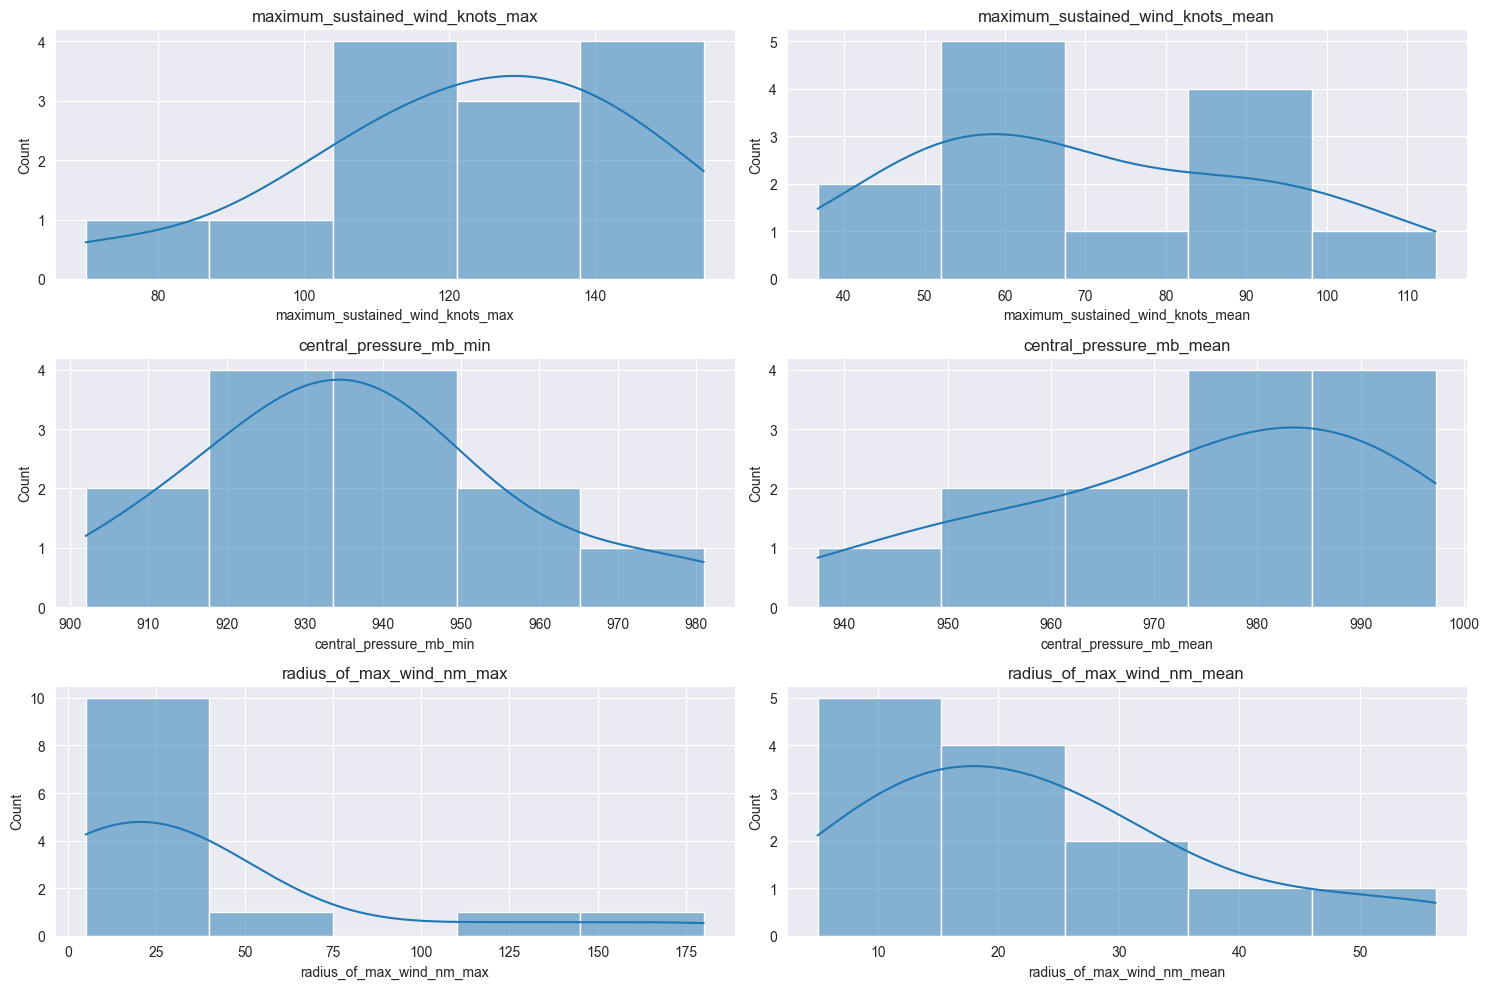

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

columns_to_show = list(df_resources_with_storm_features.columns[8:])

axes = axes.flatten()

for i, column in enumerate(columns_to_show):
    sns.histplot(df_resources_with_storm_features[column], ax=axes[i], kde=True, bins=5)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

Scatter plot to check relationship between two columns

<Figure size 800x600 with 0 Axes>

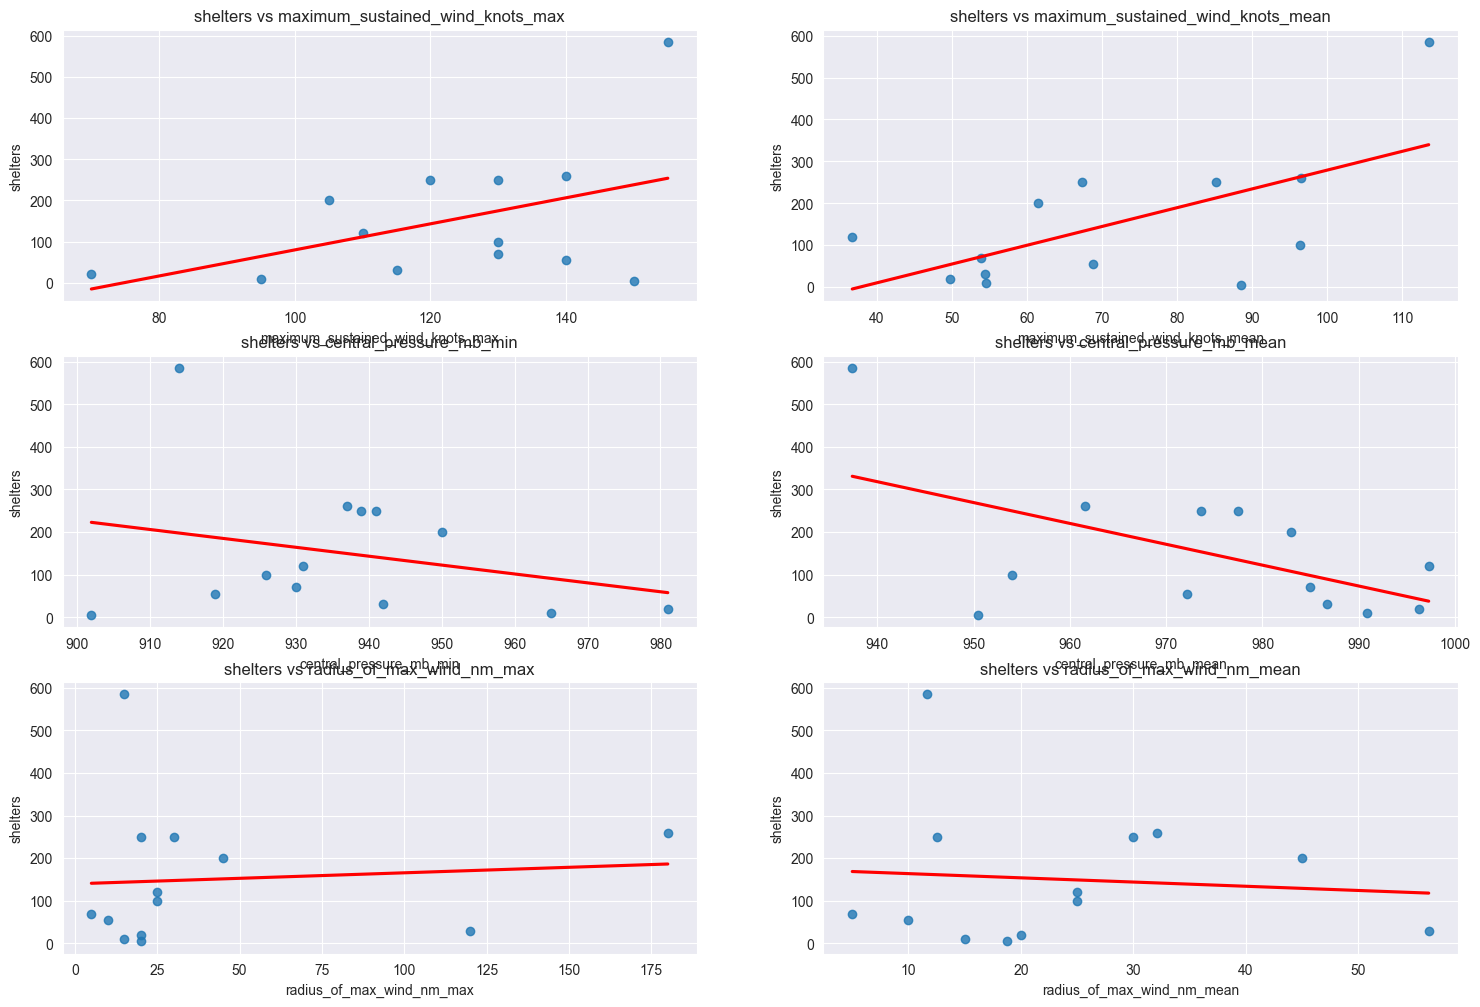

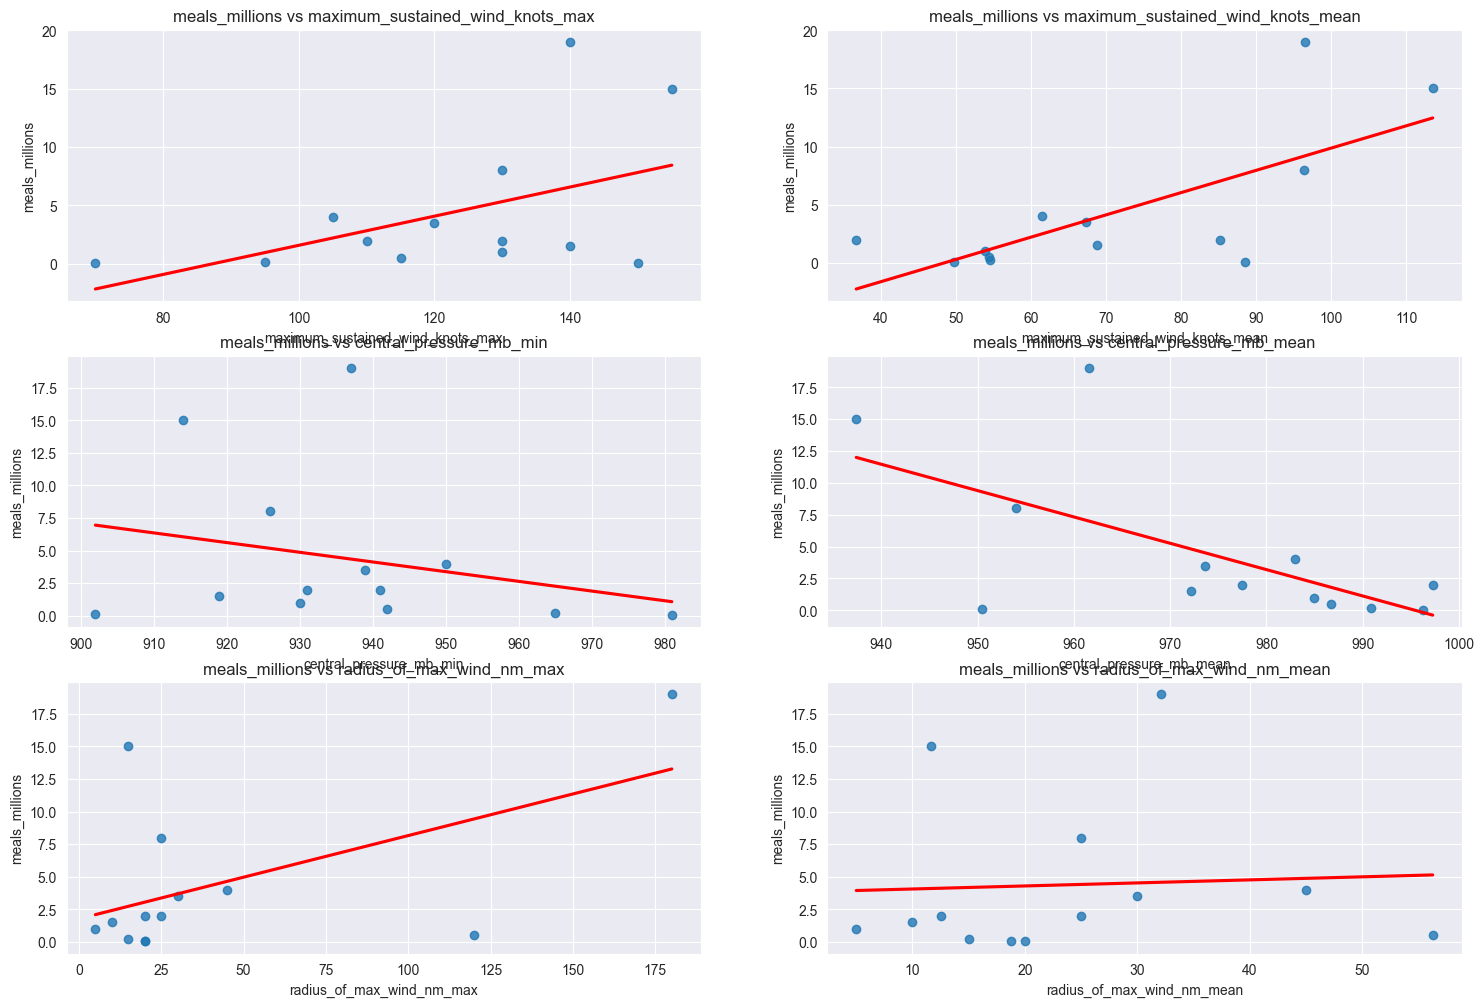

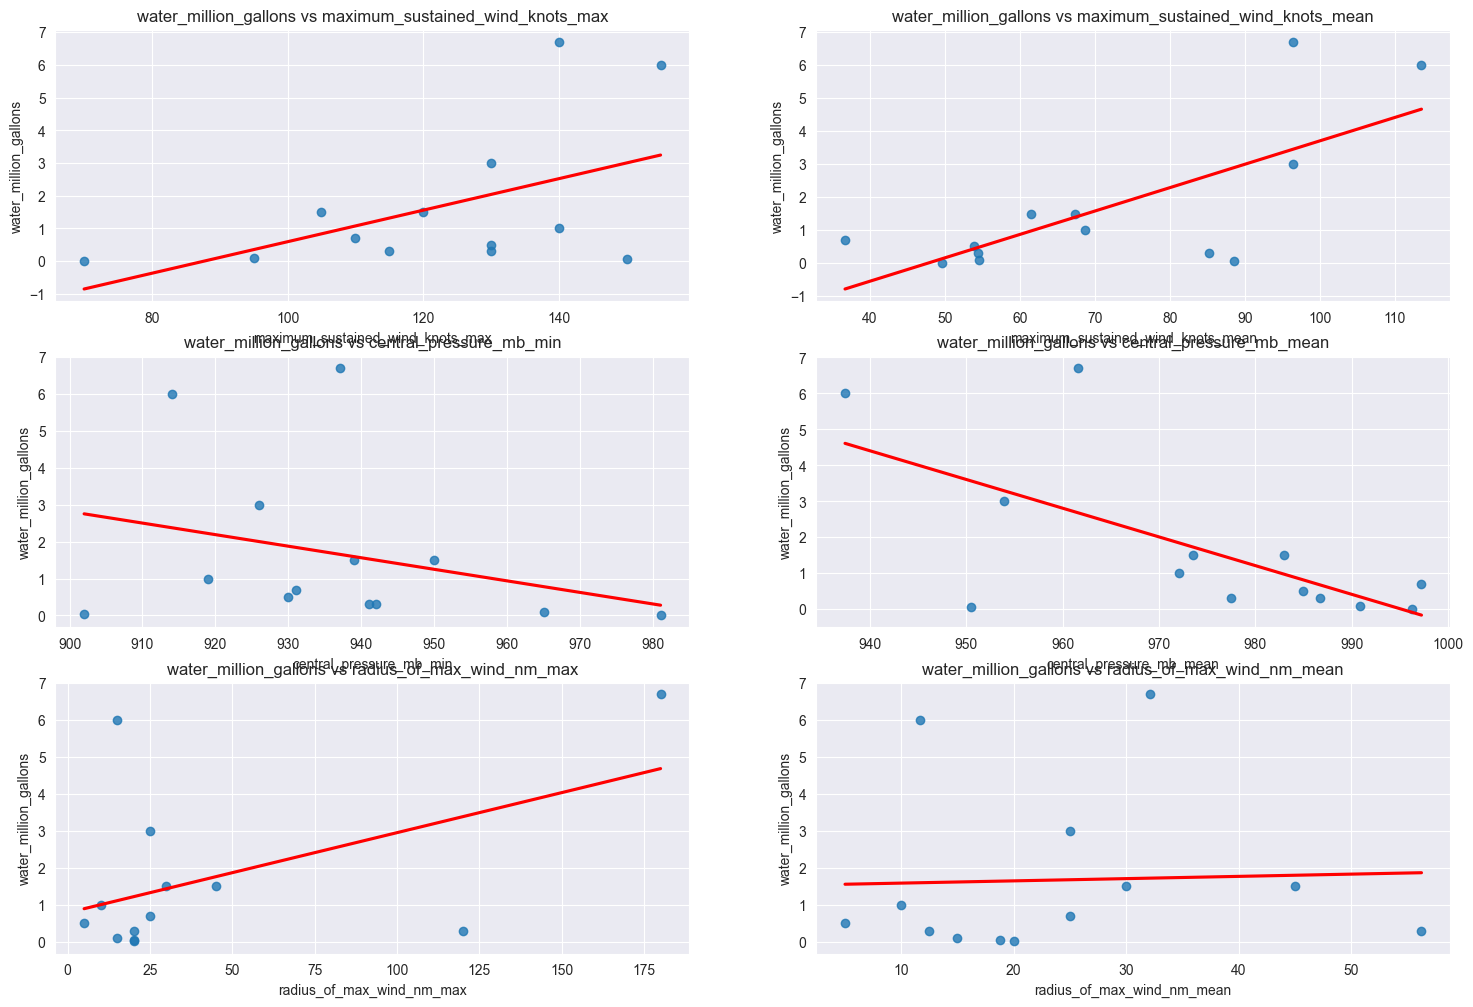

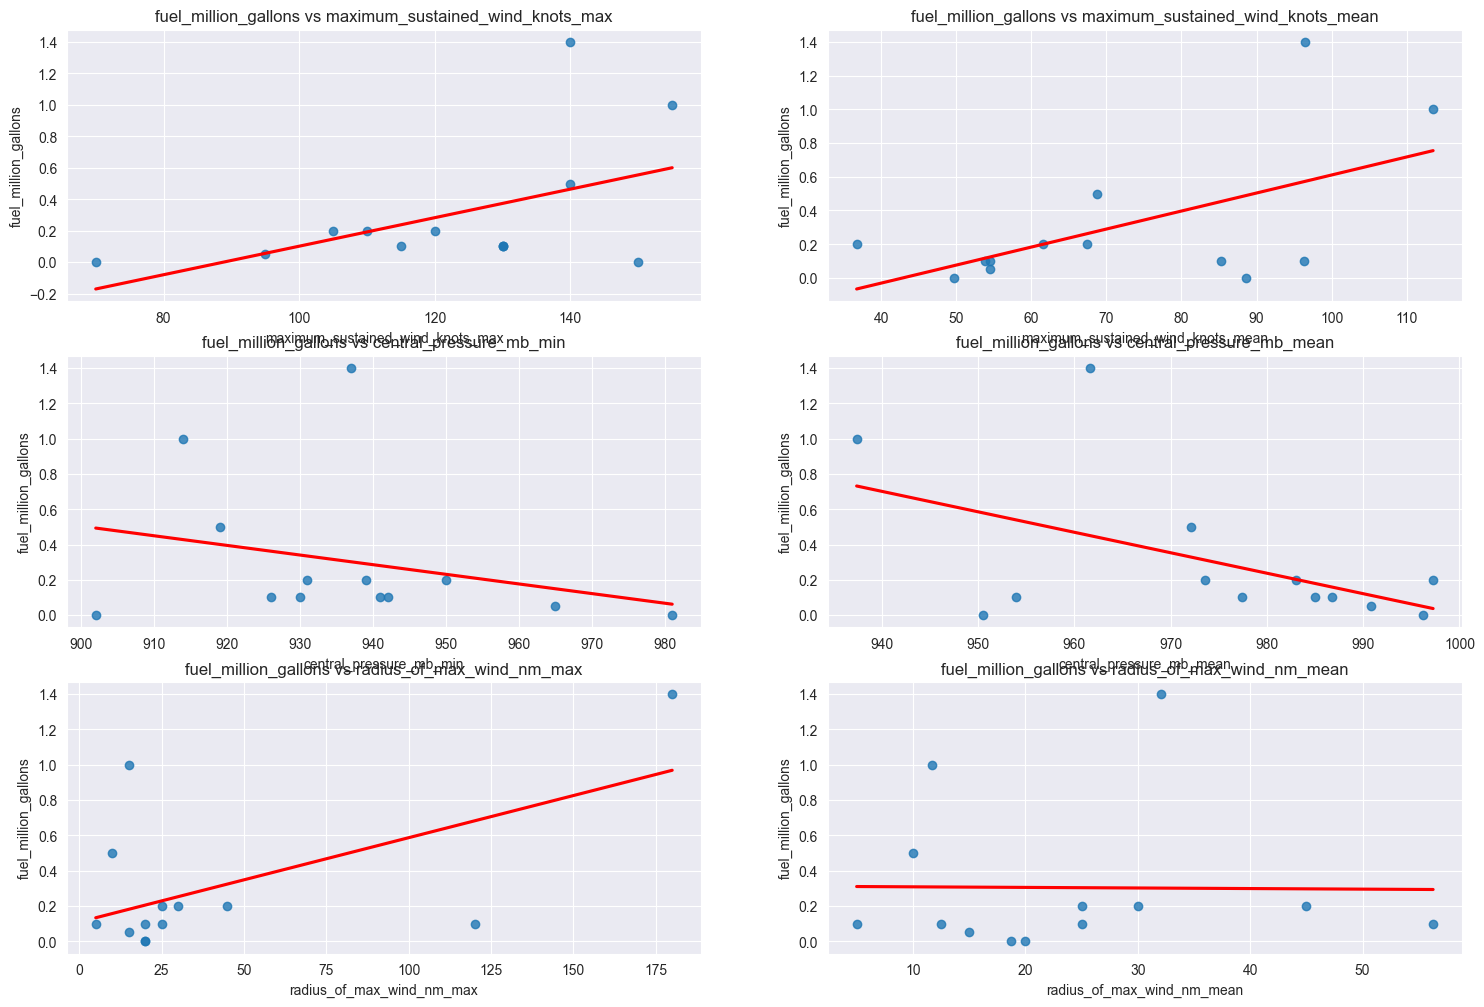

In [52]:
plt.figure(figsize=(8, 6))

x_axis = list(df_resources_with_storm_features.columns[8:])
y_axis = list(df_resources_with_storm_features.columns[3:7])
# y_axis = ['shelters']


for y_feature in y_axis:
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))

    axes = axes.flatten()
    for i, x_feature in enumerate(x_axis):
        sns.regplot(
            x=df_resources_with_storm_features[x_feature],
            y=df_resources_with_storm_features[y_feature],
            scatter=True,
            fit_reg=True,
            line_kws={'color': 'red'},
            ci=None,
            ax=axes[i]
        )

        axes[i].set_title(f'{y_feature} vs {x_feature}')
        axes[i].set_xlabel(x_feature)
        axes[i].set_ylabel(y_feature)

    plt.show()